**Выше** было рассмотрено создание *линейных графиков, столбчатых и круговых диаграмм*. Однако, этим не ограничиваются возможности библиотек **Matplotlib, Seaborn, Plotly**. Рассмотрим ещё несколько примеров.

In [1]:
pip install pandas matplotlib seaborn plotly nbformat

# Matplotlib
**Тепловая карта** — это визуализация данных, которая использует цветовые градиенты для отображения значений в двумерной матрице. Это полезно для выявления закономерностей, а также для анализа больших объемов данных.

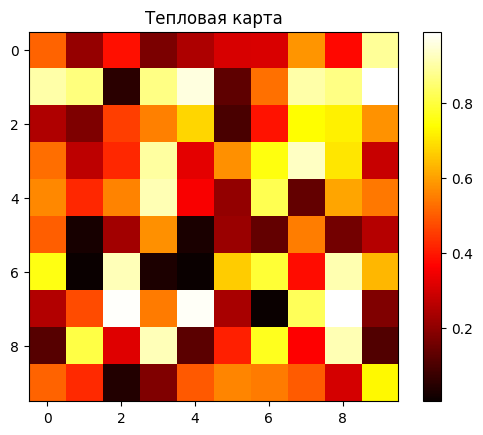

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(10, 10)

plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Тепловая карта')
plt.show()

**Диаграмма рассеяния** (или scatter plot) — это график, который отображает значения двух переменных в виде точек на двумерной плоскости. Этот тип графика помогает визуализировать взаимосвязи между переменными и выявлять закономерности или аномалии в данных.

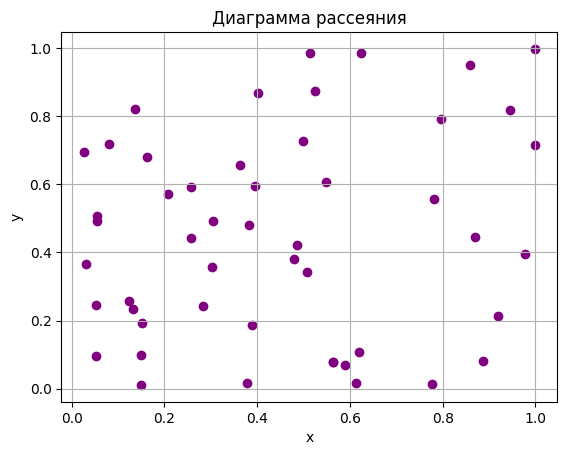

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y, color='purple')
plt.title('Диаграмма рассеяния')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

**3D график** позволяет визуализировать данные в трех измерениях, что может быть полезно для анализа сложных взаимосвязей.

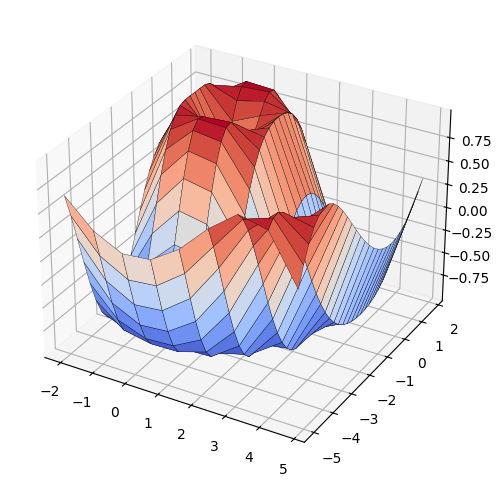

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.arange(-2, 5, 0.85)
xlen = len(x)
y = np.arange(-5, 2, 0.25)
ylen = len(y)
x, y = np.meshgrid(x, y)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r * 1.3)

ax = plt.figure(figsize=(8, 6))
ax = ax.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm, edgecolor='black', linewidth=0.23, antialiased=True)

plt.show()

# Seaborn
**Коробчатые графики** (box plots) в библиотеке Seaborn — это мощный инструмент для визуализации распределения данных и выявления выбросов. Они показывают медиану, квартильные значения и разброс данных.

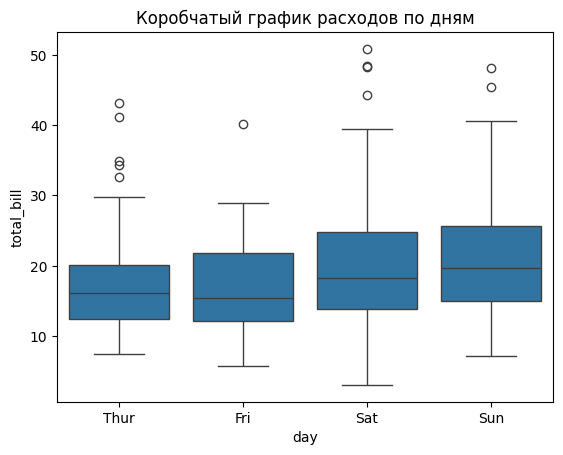

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
tips = sns.load_dataset("tips")

# Создание коробчатого графика
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("Коробчатый график расходов по дням")
plt.show()


**Скрипичные графики** (violin plots) в библиотеке Seaborn — это расширенная версия коробчатых графиков, которые не только показывают основные статистические характеристики, но и визуализируют распределение данных. Они представляют собой комбинацию коробчатого графика и графика плотности, что позволяет лучше понять форму распределения.

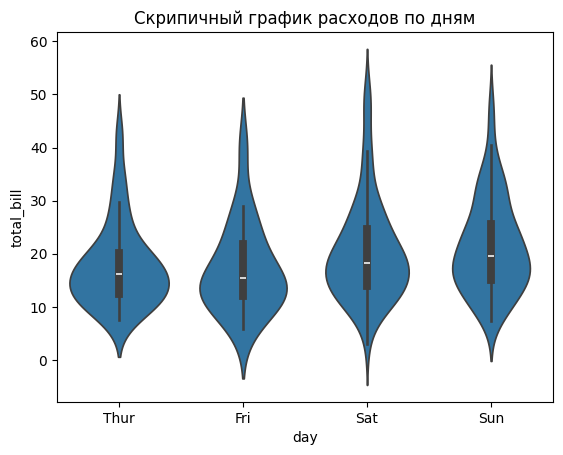

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
tips = sns.load_dataset("tips")

# Создание скрипичного графика
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("Скрипичный график расходов по дням")
plt.show()

**Парные графики** (pair plots) в библиотеке Seaborn — это мощный инструмент для визуализации взаимосвязей между несколькими переменными в наборе данных. Они позволяют быстро оценить как корреляции между переменными, так и распределения каждой переменной.

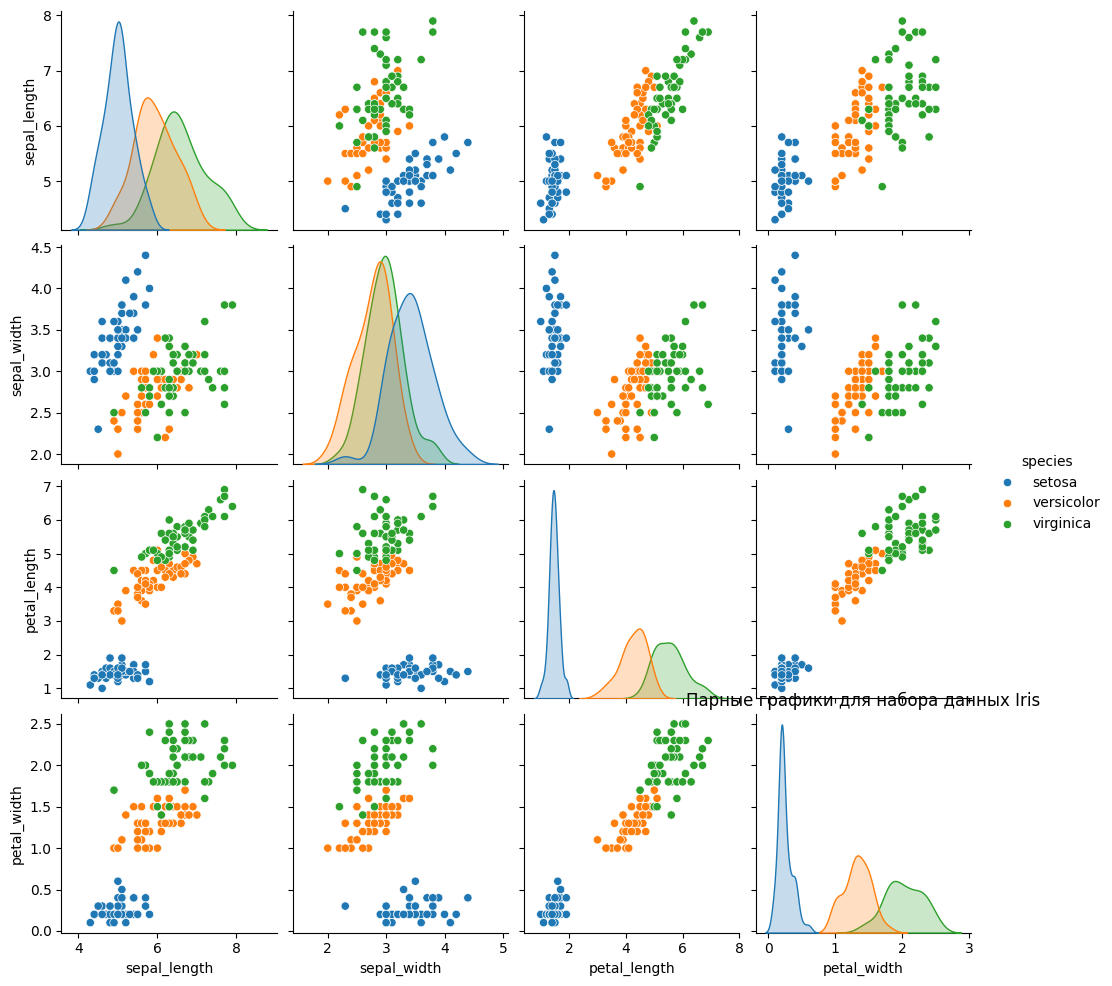

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
iris = sns.load_dataset("iris")

# Создание парного графика
sns.pairplot(iris, hue="species")
plt.title("Парные графики для набора данных Iris")
plt.show()


# Plotly
**Пузырьковая диаграмма** в Plotly — это визуализация, которая позволяет отображать три числовые переменные, где две переменные представлены осями X и Y, а третья переменная определяется размером пузырьков. Это полезно для выявления взаимосвязей между данными и для представления дополнительной информации в виде размера пузырьков.

In [30]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math
# Load data, define hover text and bubble size
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])
hover_text = []
bubble_size = []
for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))
df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)
# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}
# Create figure
fig = go.Figure()
for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))
# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))
fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

Создание **3D графиков** в Plotly позволяет визуализировать данные в трех измерениях, что может быть полезно для анализа сложных взаимосвязей.

In [31]:
import plotly.express as px
import pandas as pd

# Пример данных
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 11, 12, 13, 14],
    'z': [5, 6, 7, 8, 9],
    'category': ['A', 'B', 'A', 'B', 'A']
})

# Создание 3D графика
fig = px.scatter_3d(df, x='x', y='y', z='z', color='category',
                     title='3D Рассеянный график',
                     labels={'x': 'Ось X', 'y': 'Ось Y', 'z': 'Ось Z'})

# Отображение графика
fig.show()
